In [2]:
import pandas as pd
import numpy as np

Import Data

In [3]:
data = pd.read_csv("Position_Salaries.csv")
X = data.iloc[: , 1:-1].values
y = data.iloc[:, -1].values

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Set Decision model

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0 , max_depth=4)
tree.fit(X,y)

DecisionTreeRegressor(max_depth=4, random_state=0)

Predict with model

In [5]:
value = tree.predict([[6.5]])
print("Predicted for 6.5 = ", value)

Predicted for 6.5 =  [150000.]


Visualize (Not the right way to visualize decision tree as it is not one smooth curve)

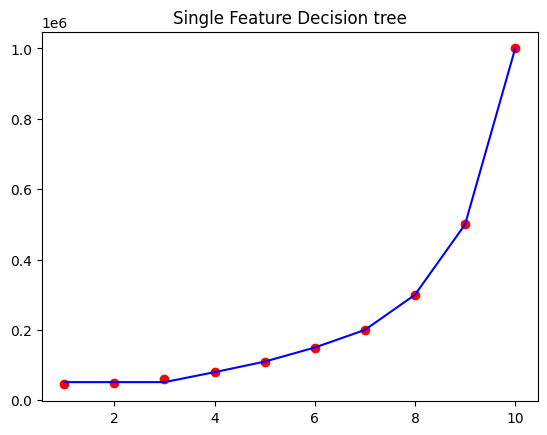

In [6]:
y_pred = tree.predict(X)

import matplotlib.pyplot as plt
plt.plot(X , y_pred , color="blue")
plt.scatter(X,y,color="red")
plt.title("Single Feature Decision tree")
plt.show()

Higher Resolution (Right way)

[[1.  ]
 [1.01]
 [1.02]
 [1.03]
 [1.04]
 [1.05]
 [1.06]
 [1.07]
 [1.08]
 [1.09]
 [1.1 ]
 [1.11]
 [1.12]
 [1.13]
 [1.14]
 [1.15]
 [1.16]
 [1.17]
 [1.18]
 [1.19]
 [1.2 ]
 [1.21]
 [1.22]
 [1.23]
 [1.24]
 [1.25]
 [1.26]
 [1.27]
 [1.28]
 [1.29]
 [1.3 ]
 [1.31]
 [1.32]
 [1.33]
 [1.34]
 [1.35]
 [1.36]
 [1.37]
 [1.38]
 [1.39]
 [1.4 ]
 [1.41]
 [1.42]
 [1.43]
 [1.44]
 [1.45]
 [1.46]
 [1.47]
 [1.48]
 [1.49]
 [1.5 ]
 [1.51]
 [1.52]
 [1.53]
 [1.54]
 [1.55]
 [1.56]
 [1.57]
 [1.58]
 [1.59]
 [1.6 ]
 [1.61]
 [1.62]
 [1.63]
 [1.64]
 [1.65]
 [1.66]
 [1.67]
 [1.68]
 [1.69]
 [1.7 ]
 [1.71]
 [1.72]
 [1.73]
 [1.74]
 [1.75]
 [1.76]
 [1.77]
 [1.78]
 [1.79]
 [1.8 ]
 [1.81]
 [1.82]
 [1.83]
 [1.84]
 [1.85]
 [1.86]
 [1.87]
 [1.88]
 [1.89]
 [1.9 ]
 [1.91]
 [1.92]
 [1.93]
 [1.94]
 [1.95]
 [1.96]
 [1.97]
 [1.98]
 [1.99]
 [2.  ]
 [2.01]
 [2.02]
 [2.03]
 [2.04]
 [2.05]
 [2.06]
 [2.07]
 [2.08]
 [2.09]
 [2.1 ]
 [2.11]
 [2.12]
 [2.13]
 [2.14]
 [2.15]
 [2.16]
 [2.17]
 [2.18]
 [2.19]
 [2.2 ]
 [2.21]
 [2.22]
 [2.23]
 [2.24]


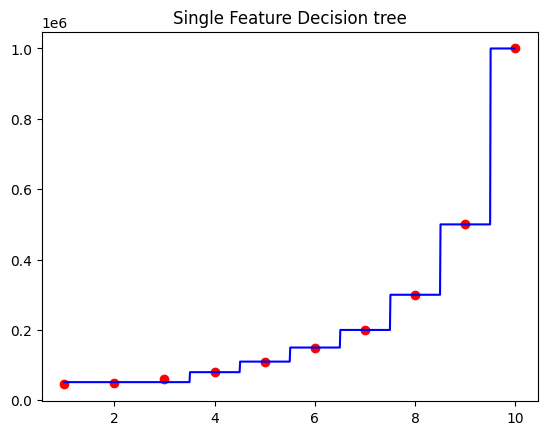

In [7]:
# create a contious array incremented by 0.01 start from min of X and max X matruice
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
print(X_grid)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, tree.predict(X_grid), color = 'blue')
plt.title("Single Feature Decision tree")
plt.show()

In [8]:
from sklearn.tree import export_text

text_repr = export_text(tree)
print(text_repr)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- value: [51666.67]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- feature_0 >  6.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- feature_0 >  7.50
|   |   |   |--- value: [300000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



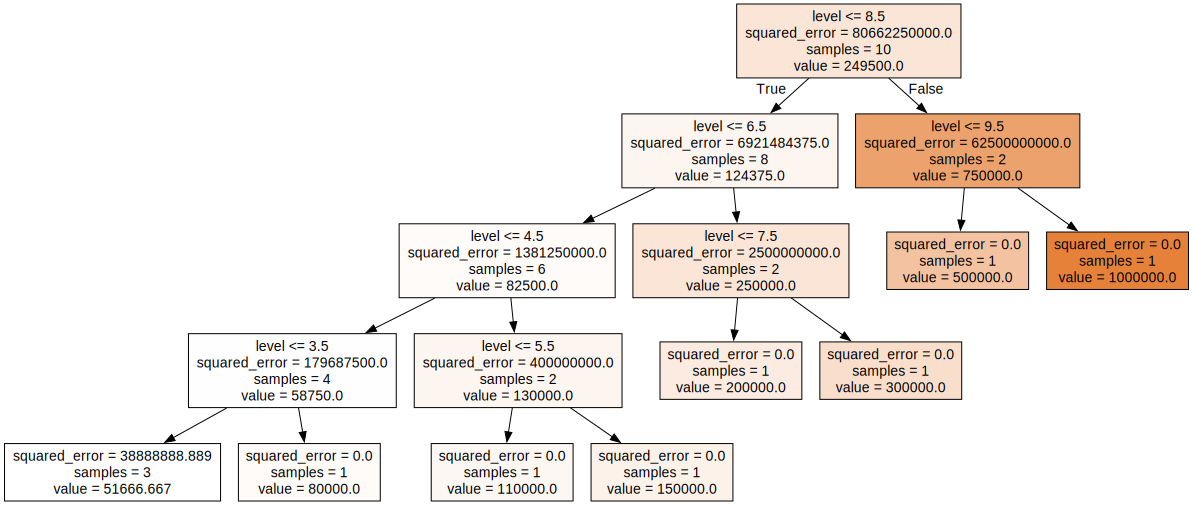

In [19]:
import os
os.environ["PATH"] += os.pathsep +"C:\Program Files\Graphviz\bin"

from sklearn.tree import export_graphviz
graph_data = export_graphviz(tree , out_file=None , filled=True , feature_names=["level"])
import graphviz

graphviz.Source(graph_data , format ="png")

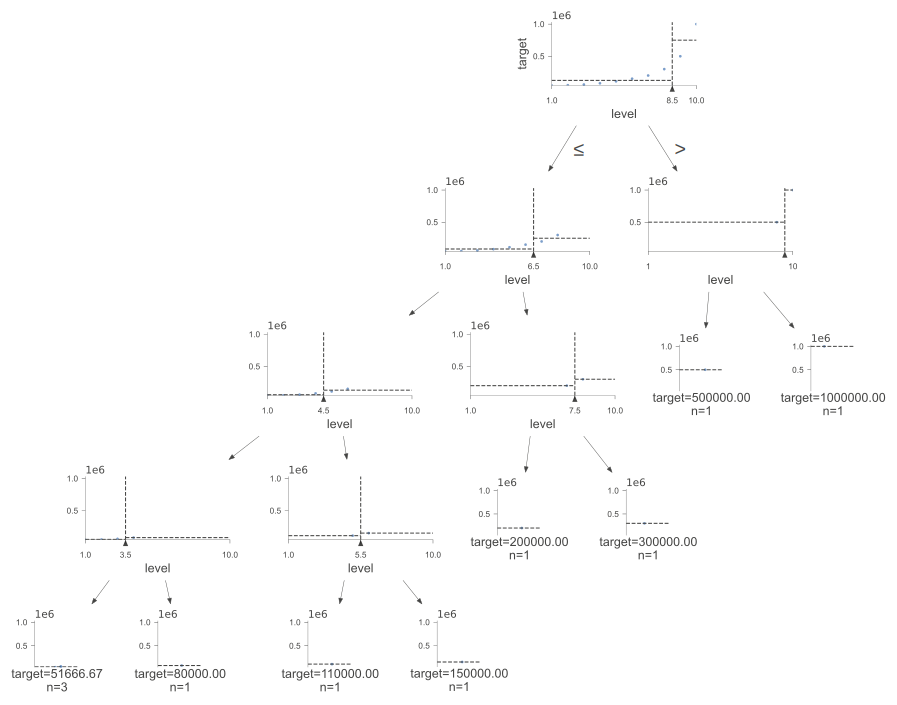

In [20]:
import dtreeviz
# from dtreeviz.trees import dtreeviz

viz = dtreeviz.model(tree, X, y,
                target_name="target", feature_names=["level"])
viz.view(scale=1.4)

Decisoin tree Visual

In [13]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE=",mean_absolute_error(y_true = y ,y_pred= y_pred))
print("MAE=",mean_squared_error(y_true = y ,y_pred= y_pred))
print("R2 Score=",r2_score(y_true = y ,y_pred= y_pred))

MSE= 0.0
MAE= 0.0
R2 Score= 1.0
